In [1]:
%matplotlib inline
# autoload the package, for debuge purpose
%load_ext autoreload
%autoreload 2

# import modules and plot setting
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import datetime
from astropy.table import Table
from astropy.io import fits
#from mangatools import maps, utils

today = datetime.date.today().isoformat()

# set the display properties
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# customize the warning message
import warnings
warnings.filterwarnings("default") # default or ignore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fraquelli2003

In [2]:
from astropy.table import Table
# read data from (Fraquelli 2003) 
fraquelli2003 = Table.read('data/Fraquelli2003.txt', format='ascii')
fraquelli2003[:2]

name,L_OIII,delta,distance,scale
str14,float64,float64,float64,int64
ESO417-G6,38.3,-3.5,63.89,310
Fairall316,35.91,-2.9,63.63,308


escape: NGC1386
escape: NGC5643


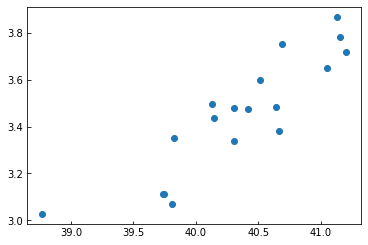

In [3]:
# convert fraquelli2001 to surface brightness
SB = 1e-16
r = np.linspace(100, 40000, 1000)
dr = np.diff(r)
r = r[0:-1]
fra03_r = []
fra03_L = []

for i in range(0, len(fraquelli2003)):
    # exclude two also observerd by Bennert2006a
    if fraquelli2003['name'][i] == 'NGC5643' or fraquelli2003['name'][i] == 'NGC1386':
        print("escape:", fraquelli2003['name'][i])
    L_tmp = fraquelli2003['L_OIII'][i] + fraquelli2003['delta'][i] * (np.log10(r) - np.log10(100))
    #print(logF)
    threshold = np.log10(SB*4*np.pi*fraquelli2003['distance'][i]**2 
                     *(u.Mpc.to(u.cm))**2/(fraquelli2003['scale'][i]**2))
    #print(threshold)
    sel = L_tmp < threshold
    fra03_L.append(np.log10(np.sum(10**L_tmp[sel] * 2*np.pi*r[sel]*dr[sel])))
    r_tmp = np.min(r[sel])
    fra03_r.append(np.log10(r_tmp))
fra03_L = np.array(fra03_L)
fra03_r = np.array(fra03_r)
if True: #plot
    plt.plot(fra03_L, fra03_r, 'o')
    #print(fra2003_r, fra2003_L)

### Bennert2006a

In [4]:
bennert2006a = Table.read('data/Bennert2006a.txt', format='ascii')
bennert2006a[:2]

name,dist,scale,R_NLR,L0_OIII,delta,delta_err
str11,int64,int64,int64,float64,float64,float64
IC5063,47,220,2860,38.41,-2.73,0.33
NGC7212,110,504,5040,38.46,-2.13,0.57


Escape bad fit: ESO362-G008


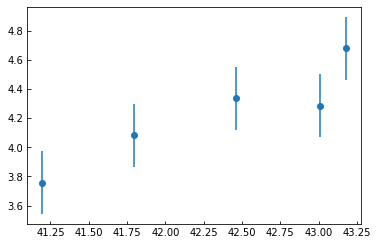

In [5]:
# convert fraquelli2001 to surface brightness
r = np.linspace(100, 400000, 1000)
dr = np.diff(r)
r = r[0:-1]
ben06a_L = []
ben06a_r = []
ben06a_r_err = []
SB = 1e-16

for i in range(0, len(bennert2006a)):
    if bennert2006a['delta'][i] > -1e-6:
        print('Escape bad fit:', bennert2006a['name'][i])
        continue
    L_tmp = bennert2006a['L0_OIII'][i] + bennert2006a['delta'][i] * (np.log10(r) - np.log10(100))
    #print(logF)
    threshold = np.log10(SB*4*np.pi*bennert2006a['dist'][i]**2 
                     *(u.Mpc.to(u.cm))**2/(bennert2006a['scale'][i]**2))
    #print(threshold)
    sel = L_tmp < threshold
    ben06a_L.append(np.log10(np.sum(10**L_tmp[sel] * 2*np.pi*r[sel]*dr[sel])))
    r_tmp = np.min(r[sel])
    ben06a_r.append(np.log10(r_tmp))
    ben06a_r_err.append(0.5/np.log(10)) #need update
ben06a_L = np.array(ben06a_L)
ben06a_r = np.array(ben06a_r)
ben06a_r_err = np.array(ben06a_r_err)
if True:
    #print(r_bennert_a, F_bennert_a)
    plt.errorbar(ben06a_L, ben06a_r, yerr=ben06a_r_err, marker='o', linestyle='None')

### Bennert2006b

In [6]:
bennert2006b = Table.read('data/Bennert2006b.txt', format='ascii')
bennert2006b[:2]

name,dist,scale,R_NLR,L0_OIII,delta,delta_err
str13,int64,int64,int64,float64,float64,float64
Fairall51,60,283,2260,38.14,-3.55,0.25
NGC6860,62,293,1465,37.69,-3.06,0.12


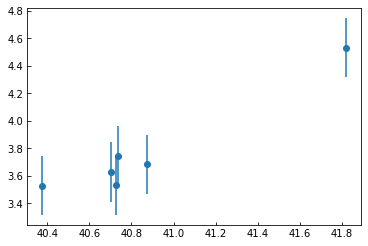

In [7]:
# convert fraquelli2001 to surface brightness
r = np.linspace(100, 40000, 1000)
SB = 1e-16
dr = np.diff(r)
r = r[0:-1]
ben06b_L = []
ben06b_r = []
ben06b_r_err = []
for i in range(0, len(bennert2006b)):
    if bennert2006b['delta'][i] > -1e-6:
        print('Escape bad fit:', bennert2006b['name'][i])
        continue
    L_tmp = bennert2006b['L0_OIII'][i] + bennert2006b['delta'][i] * (np.log10(r) - np.log10(100))
    #print(logF)
    threshold = np.log10(SB*4*np.pi*bennert2006b['dist'][i]**2 
                     *(u.Mpc.to(u.cm))**2/(bennert2006b['scale'][i]**2))
    #print(threshold)
    sel = L_tmp < threshold
    ben06b_L.append(np.log10(np.sum(10**L_tmp[sel] * 2*np.pi*r[sel]*dr[sel])))
    r_tmp = np.min(r[sel])
    ben06b_r.append(np.log10(r_tmp))
    ben06b_r_err.append(0.5/np.log(10)) #need update

ben06b_L = np.array(ben06b_L)
ben06b_r = np.array(ben06b_r)
ben06b_r_err = np.array(ben06b_r_err)

if True:
    #print(r_bennert_a, F_bennert_a)
    plt.errorbar(ben06b_L, ben06b_r, yerr=ben06b_r_err, marker='o', linestyle='None')

### Greene2011

In [8]:
greene2011 = Table.read('data/Greene2011.txt', format='ascii')
greene2011[:2]

SDSS,z,LOIII,ROIII,RCont,FWHM,beta1,beta2,uplimit
str10,float64,float64,float64,float64,float64,float64,float64,int64
J0157−0053,0.422,42.91,4.3,4.0,3.0,2.9,3.2,1
J1106+0357,0.242,42.52,4.0,4.1,2.8,2.9,3.2,0


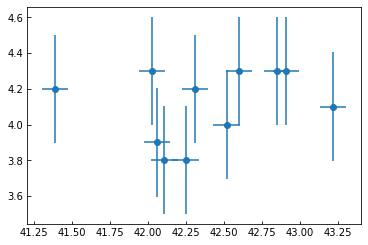

In [9]:
gre11_L = greene2011['LOIII'].data
gre11_L_err = np.full_like(gre11_L, 0.2/np.log(10)) # 20% error for dust extinction
#gre11_r_up = -1/greene2011['beta1'].data + greene2011['ROIII'].data
#gre11_r_low = -1/greene2011['beta2'].data + greene2011['ROIII'].data
#gre11_r = 0.5 * (gre11_r_up + gre11_r_low) #* (1+greene2011['z'])**4
#gre11_r_err = np.abs(gre11_r - gre11_r_low) + np.log10(3)/np.log(10) # (3r)/r/np.log(10)
gre11_r = greene2011['ROIII'] #* (1+greene2011['z'])**4)
gre11_r_err = np.log10(5)/np.log(10)
if True:
    plt.errorbar(gre11_L, gre11_r, xerr=gre11_L_err, yerr=gre11_r_err, linestyle='None', marker='o')

### Liu2013

#### Read data from files

In [ ]:
liu2013 = Table.read('data/Liu2013.txt', format='ascii')
liu2013[:]

In [ ]:
liu2013['z'].data

In [ ]:
liu13_L = liu2013['L_OIII'].data
liu13_L_err = np.full_like(liu13_L, 0.2/np.log(10)) # 20% uncertainty for type2 AGNs
liu13_r = np.log10(liu2013['R_int'].data * 1000)
liu13_r_err = np.full_like(liu13_r, 0.2/np.log(10))
liu13_islimit = np.full(liu13_r.shape, False)
#liu13_L = liu13_L.tolist()
#liu13_r = liu13_r.tolist()
#liu13_r_err = liu13_r_err.tolist()

if True:
    plt.errorbar(liu13_L, liu13_r, xerr=liu13_L_err, yerr=liu13_r_err, marker='o', ls='None')

#### PSF effect

##### model the PSF by Gausian

In [ ]:
def psf_new(r, params):
    # multiple gaussian modeled psf
    y = 0
    for i in range(0, len(params), 3):
        y = y + params[i+0]* np.exp( -(r - params[i+1])**2/(2*params[i+2]**2))
    return y

In [ ]:
# tow gaussian modeled psf
# take JJ0149-0048 as an example
from astropy.modeling import models, fitting

liu2013_psf = np.array([3.4,4.0,2.5,3.9,3.7,4.1,3.25,3.15,4.0,3.7,5.0,3.7,3.9,4.3])
tab_star = Table.read('data/Liu2013/star_ell.fits')
liu2013_psf_FWHM = []

#plt.semilogy(tab_star['SMA'] * 0.1 * 3.4 * 0.145779 / 0.6, tab_star['INTENS']/max(tab_star['INTENS']), ':')
for psf in [4.3]:#liu2013_psf:
    x = tab_star['SMA'] * 0.1 * 4 * 0.145779 / 0.6
    y = tab_star['INTENS']/max(tab_star['INTENS'])
    g_init1 = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1)
    g_init2 = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1) + models.Gaussian1D(amplitude=0.1, mean=0, stddev=1)
    fit_g1 = fitting.LevMarLSQFitter()
    fit_g2 = fitting.LevMarLSQFitter()
    g1 = fit_g1(g_init1, x, y)
    g2 = fit_g1(g_init2, x, y)
    #print(g1.parameters)
    #print(g.stddev.value * 2.355 )
    #liu2013_psf_FWHM.append(g.stddev_1.value * 2.35482)
if 1:
    plt.figure()
    plt.semilogy(x, y, 'ko')
    #plt.plot(x, psf_new(x, g.parameters), 'r', lw=4)
    plt.plot(x, g1(x), label='One Gaussian')
    plt.plot(x, g2(x), label='Two Gaussian')
    plt.ylim(0.01, 1.1)
    plt.legend()
print(g1.parameters, g2.parameters)

In [ ]:
# single gaussian modeled psf
# take JJ0149-0048 as an example
from astropy.modeling import models, fitting

liu2013_psf = np.array([3.4,4.0,2.5,3.9,3.7,4.1,3.25,3.15,4.0,3.7,5.0,3.7,3.9,4.3])
tab_star = Table.read('data/Liu2013/star_ell.fits')
liu2013_psf_FWHM = []

#plt.semilogy(tab_star['SMA'] * 0.1 * 3.4 * 0.145779 / 0.6, tab_star['INTENS']/max(tab_star['INTENS']), ':')
for psf in liu2013_psf:
    x = tab_star['SMA'] * 0.1 * psf * 0.145779 / 0.6
    y = tab_star['INTENS']/max(tab_star['INTENS'])
    g_init = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1) 
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, x, y)
    #print(g.parameters)
    liu2013_psf_FWHM.append(g.stddev.value * 2.355)
if 0:
    plt.figure()
    plt.semilogy(x, y, 'ko')
    plt.plot(x, psf_new(x, g.parameters), 'r', lw=4)
    plt.plot(x, g(x), label='model')
    plt.ylim(0.01, 1.1)
print(liu2013_psf_FWHM)

In [ ]:
liu2013_obj = np.array(['J0149-0048','J0210-1001','J0319-0019','J0319-0058','J0321+0016','J0759+1339',
                     'J0841+2042','J0842+3625','J0858+4417','J1039+4512','J1040+4745','J0224+2750', \
                     'J0807+4946','J1101+4004'])
liu2013_psf = np.array([3.4,4.0,2.5,3.9,3.7,4.1,3.25,3.15,4.0,3.7,5.0,3.7,3.9,4.3])
tab_star = Table.read('data/Liu2013/star_ell.fits')
for idx, obj in enumerate(['J0319-0019']):#liu2013_obj):
    tab_obj = Table.read('data/Liu2013/{}ell.fits'.format(obj))
    plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])#/max(tab_obj['INTENS']))
    #plt.semilogy(tab_star['SMA'] * 0.1 * liu2013_psf[idx] * 0.145779 / 0.6, tab_star['INTENS']/max(tab_star['INTENS']), ':')
#plt.ylim(0.01, 1)

In [ ]:
# repeat the results of Liu2013
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(71, 0.27, 0.73)

liu2013_obj = np.array(['J0149-0048','J0210-1001','J0319-0019','J0319-0058','J0321+0016','J0759+1339',
                     'J0841+2042','J0842+3625','J0858+4417','J1039+4512','J1040+4745','J0224+2750', \
                     'J0807+4946','J1101+4004'])
liu2013_z = np.array([0.566, 0.54 , 0.635, 0.626, 0.643, 0.649, 0.641, 0.561, 0.454,
                0.579, 0.486, 0.311, 0.575, 0.457])
peak=[1.58,3.19,1.37,1.38,0.96,3.93,6.72,6.13,2.64,5.20,3.31,2.40,2.66,2.36]

SB = 100

if False: #save fitting results into file
    fsb_file = open('data/liu2013_R_fsb-{}.dat'.format(today), 'w')
    fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
        'plateifu', 'logR_fsb1', 'logR_fsb1_err', 'logR_fsb2', 'logR_fsb2_err', \
        'logR_fsb2_orig', 'logR_fsb2_orig_err', 'is_limit'))
for idx, obj in enumerate(liu2013_obj):
    tab_obj = Table.read('data/Liu2013/{}ell.fits'.format(obj))
    #plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])
    #psf = liu2013_psf_FWHM[idx]
    z = liu2013_z[idx]
    sb_corr = (1 + z)**4
    arcsec2kpc = cosmo.kpc_comoving_per_arcmin(z).to(u.kpc/u.arcsec)
    r = tab_obj['SMA'] * 0.1 
    Ip = peak[idx] * 1000
    I = tab_obj['INTENS']
    I_err = tab_obj['INT_ERR']
    I_err[0] = I_err[1]
    snr = I / I_err
    valid = snr > 5
    r = r[valid]
    I = I[valid]
    #print('-----', np.max(I), Ip)
    I = I * Ip / np.max(I) #* sb_corr
    #I = I * sb_corr
    r_extend = np.linspace(r.min(), 5*r.max(), 5000)
    I_extend = np.interp(r_extend, r, I)
    R16 = np.max(r_extend[I_extend > SB])
    logR16 = np.log10(R16 * arcsec2kpc.value*1000)
    print(z, np.max(I), R16*arcsec2kpc.value, logR16, np.min(snr))

In [ ]:
SB = 100

for idx, obj in enumerate(['J0149-0048',]):
    tab_obj = Table.read('data/Liu2013/{}ell.fits'.format(obj))
    #plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])
    #psf = liu2013_psf_FWHM[idx]
    z = liu2013_z[idx]
    sb_corr = (1 + z)**4
    arcsec2kpc = cosmo.kpc_comoving_per_arcmin(z).to(u.kpc/u.arcsec)

    r = tab_obj['SMA'] * 0.1 
    Ip = peak[idx] * 1000
    I = tab_obj['INTENS']
    I_err = tab_obj['INT_ERR']
    I_err[0] = I_err[1]
    snr = I / I_err
    valid = snr > 5
    r = r[valid]
    I = I[valid]
    I = I * Ip / np.max(I) * sb_corr
    #I = I * sb_corr
    r_extend = np.linspace(r.min(), 1.5*r.max(), 5000)
    I_extend = np.interp(r_extend, r, I)
    R16 = np.max(r_extend[I_extend > SB])
    logR16 = np.log10(R16 * arcsec2kpc.value*1000)
    print(z, np.max(I), R16, R16*arcsec2kpc.value, logR16)
    
    if True:
        plt.semilogy(r, I/1e4, 'o')
        plt.plot(r_extend, I_extend/1e4)
        plt.axhline(y=SB/1e4, linestyle='-.', color='r')

##### Statistics

In [ ]:
# Statistics, signle gaussian modeled psf
# History:
#    2019-04-09: Follow the same method we used to analyse the data of Liu2013

# global value
import numpy as np
from scipy import optimize, signal
from matplotlib import pyplot as plt
from astropy.cosmology import LambdaCDM
from astropy import units as u
import matplotlib.backends.backend_pdf as mpdf

def psf_func(r, amplitude=0, mean=0, stddev=0):
    return amplitude * np.exp(-(r-mean)**2/(2*stddev**2))

def psf_kernel(fwhm, interv=1, data_points=50):
    edge = data_points/(2*interv)
    r = np.arange(-edge, edge+interv, interv)
    sigma = fwhm/2.35482
    return np.exp(-r**2/(2*sigma**2))

def fmodel_conv(x, r, basemodel, psf_fwhm=None, points=50, scale_factor=1.5):
    # used for convolution
    r_interp = np.linspace(r.min(), 1.5*r.max(), points)
    flux = basemodel(x, r_interp)
    psf = psf_kernel(psf_fwhm, r_interp[1]-r_interp[0])
    flux_sym = np.array([flux[::-1], flux]).flatten()
    flux_conv = signal.fftconvolve(flux_sym, psf, mode='same')/np.sum(psf)
    return np.interp(r, r_interp, flux_conv[len(flux_sym)//2:])


plot = True
save = True
SB = 10
sample_times = 10
quiet = True
cosmo = LambdaCDM(70, 0.3, 0.7)

excess_num = 0
undetect = 0

liu2013_obj = np.array(['J0149-0048','J0210-1001','J0319-0019','J0319-0058','J0321+0016','J0759+1339',
                     'J0841+2042','J0842+3625','J0858+4417','J1039+4512','J1040+4745','J0224+2750', \
                     'J0807+4946','J1101+4004'])
liu2013_z = np.array([0.566, 0.54 , 0.635, 0.626, 0.643, 0.649, 0.641, 0.561, 0.454,
                0.579, 0.486, 0.311, 0.575, 0.457])

if plot: #plot into file
    pdf = mpdf.PdfPages('results/liu2013_checkfit-{}.pdf'.format(today))

if save: #save fitting results into file
    fsb_file = open('data/liu2013_R_fsb-{}.dat'.format(today), 'w')
    fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
        'plateifu', 'logR_fsb1', 'logR_fsb1_err', 'logR_fsb2', 'logR_fsb2_err', \
        'logR_fsb2_orig', 'logR_fsb2_orig_err', 'is_limit'))
for idx, obj in enumerate(liu2013_obj):
    tab_obj = Table.read('data/Liu2013/{}ell.fits'.format(obj))
    plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])
    psf = liu2013_psf_FWHM[idx]
    z = liu2013_z[idx]
    sb_corr = (1 + z)**4
    arcsec2kpc = cosmo.kpc_comoving_per_arcmin(z).to(u.kpc/u.arcsec)

    r = tab_obj['SMA'] * 0.1 
    I = tab_obj['INTENS']
    I_err = tab_obj['INT_ERR']
    I_err[0] = I_err[1] # fix the nan
    logI = np.log(I)
    logI_err = I_err/I

    # define the model
    baseModel_1 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2]))
    #baseModel_1 = lambda x, r: np.exp(x[0] + x[1] * r)
    
    #********* fit without de-convlolution *************#
    # initial value and bounds
    x0 = (logI.max(), 1, 1)
    bounds=((0, np.inf), (0.01, 10), (0.5, 10))
    
    # used the logscale of y, to optimize the fitting
    cost_fun1 = lambda x, r, logy, logy_err: \
                np.sum((np.log(baseModel_1(x, r)) - logy)**2/(logy_err)**2)
    res_lsq1 = optimize.minimize(cost_fun1, x0,
                                 args=(r+np.random.randn(len(r))*1e-8, logI, logI_err),
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds)
    print(res_lsq1.x)
    
    #*********** fit with de-convolution ****************#
    baseModel_2 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2])) #+ np.exp(x[3] - x[4] * r**(1/x[5]))
    # initial value and bounds
    x0_2 = (logI.max(), 1, 1)#, logI.max()/2, 1, 1)
    bounds_2=((0, np.inf), (0.01, 10), (0.5, 10))#, (0, np.inf), (0.01, 10), (0.5, 10))
    
    cost_fun2 = lambda x, r, logy, logy_err, basemodel, psf_fwhm: \
                np.sum((np.log(fmodel_conv(x, r, basemodel, psf_fwhm)) - logy)**2/logy_err**2)
    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                 args=(r, logI, logI_err, baseModel_2, psf), 
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds_2)
    print(res_lsq2.x)
    
    if save: # save fitted results into file
        r_extend = np.linspace(r.min(), 5*r.max(), 1000) # for smooth plot
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, psf)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        #print(gg_fit1*sb_corr)
        R_fsb1 = np.max(r_extend[sb_corr*gg_fit1 > SB])
        R_fsb2 = np.max(r_extend[sb_corr*gg_fit2 > SB])
        R_fsb2_orig = np.max(r_extend[sb_corr*gg_fit2_orig > SB])
        logR_fsb1 = np.log10(R_fsb1 * arcsec2kpc.value*1000)
        logR_fsb1_err = .5/R_fsb1/np.log(10)
        logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
        logR_fsb2_err = .5/R_fsb2/np.log(10)
        logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
        logR_fsb2_orig_err = .5/R_fsb2_orig/np.log(10)
        
        if ((np.abs(res_lsq2.x[1] - 10) < 1e-8) or (np.abs(res_lsq2.x[2] - 10) < 1e-8)
            or (np.abs(res_lsq2.x[2] - 0.5) < 1e-8)):
            is_limit = 1
            logR_fsb2_err = .1
            logR_fsb2_orig_err = .1
        else:
            is_limit = 0
        #is_limit = 0
            
        if not is_limit: # resample to get the fitting error
            R_list = []
            R_orig_list = []
            r_extend = np.linspace(r.min(), 2*r.max(), 50)
            failed_times = 0
            for i in range(sample_times):
                logI = np.log(I + I_err*np.random.randn(len(I)))
                logI_err = I_err/I
                
                try:
                    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                                 args=(r, logI, logI_err, baseModel_2, psf), 
                                                 method='L-BFGS-B', options={'disp':False},
                                                 jac='2-point', bounds=bounds_2)
                    gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, psf)
                    gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
                    #print("gg_fit2", gg_fit2)
                    R_fsb2 = np.max(r_extend[sb_corr*gg_fit2 > SB])
                    logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
                    R_fsb2_orig = np.max(r_extend[sb_corr*gg_fit2_orig > SB])
                    logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
                    
                except:
                    print("Resmaple fitting failed {}th times!".format(failed_times+1))
                    failed_times += 1
                    continue
                R_list.append(logR_fsb2)
                R_orig_list.append(logR_fsb2_orig)

                
            logR_fsb2 = np.mean(R_list)
            logR_fsb2_err += np.std(R_list)
            logR_fsb2_orig = np.mean(R_orig_list)
            logR_fsb2_orig_err += np.std(R_orig_list)
        if not quiet:    
            print('{} {:.2f} {:.2f} {:.2f} {:.2f} {}'.format(idx+1, logR_fsb2, logR_fsb2_err, 
                   logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
        fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
            obj, logR_fsb1, logR_fsb1_err, logR_fsb2, logR_fsb2_err, \
            logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
    
    if plot:
        # generate data for plot 
        r_extend = np.linspace(r.min(), r.max(), 50) # for smooth plot
        gauss_psf = psf_func(r_extend, amplitude=I.max(), mean=0, stddev=psf/2.35482)

        fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

        # show the results of without de-convolution
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        ax = ax_list[0]
        ax.set_title('without de-convolution')
        ax.semilogy(r, sb_corr * I, 'ko')
        ax.errorbar(r, sb_corr * I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, sb_corr * gauss_psf, 'k--', label='PSF')
        ax.plot(r_extend, sb_corr * gg_fit1, label='single')
        ax.legend()
        ax.set_ylim(I.min(), 1.2*sb_corr*I.max())

        # show the results after convolution
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, psf)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        ax = ax_list[1]
        ax.set_title('with de-convolution')
        ax.semilogy(r, sb_corr * I, 'ko')
        ax.plot(r_extend, sb_corr * gauss_psf, 'k--', label='PSF')
        ax.errorbar(r, sb_corr * I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, sb_corr * gg_fit2, label='after')
        ax.plot(r_extend, sb_corr * gg_fit2_orig, label='before')
        ax.set_ylim(I.min(), 2*sb_corr*I.max())
        ax.legend()

        pdf.savefig(fig)
        plt.close(fig)

if plot:        
    pdf.close()
    %matplotlib inline
if save:
    print("save into file {}".format(fsb_file.name))
    fsb_file.close()

In [ ]:
# Statistics, two gaussian modeled psf
# History:
#    2019-04-09: Follow the same method we used to analyse the data of Liu2013
#    2019-06-20: reRun for SB=10(-1), SB=100(-2)

# global value
import numpy as np
from scipy import optimize, signal
from matplotlib import pyplot as plt
from astropy.cosmology import LambdaCDM
from astropy import units as u
import matplotlib.backends.backend_pdf as mpdf
from astropy.modeling import models, fitting

def psf_new(r, params):
    # multiple gaussian modeled psf
    y = 0
    for i in range(0, len(params), 3):
        y = y + params[i+0]* np.exp( -(r - params[i+1])**2/(2*params[i+2]**2))
    return y

def psf_kernel_new(params, interv=1, data_points=200):
    edge = data_points/(2*interv)
    r = np.arange(0, edge+interv, interv)
    y = 0
    for i in range(0, len(params), 3):
        y = y + params[i+0]* np.exp(-(r - params[i+1])**2/(2*params[i+2]**2))
    return y

def fmodel_conv(x, r, basemodel, psf_params=None, points=100, scale_factor=1.5):
    # used for convolution
    r_interp = np.linspace(r.min(), 1.5*r.max(), points)
    flux = basemodel(x, r_interp)
    psf = psf_kernel_new(psf_params, r_interp[1]-r_interp[0])
    psf_sym = np.array([psf[::-1], psf]).flatten()
    flux_sym = np.array([flux[::-1], flux]).flatten()
    flux_conv = signal.fftconvolve(flux_sym, psf_sym, mode='same')/(np.sum(psf_sym))
    return np.interp(r, r_interp, flux_conv[len(flux_sym)//2:])


plot = True
save = True
SB = 100
sample_times = 5
quiet = True
cosmo = LambdaCDM(70, 0.3, 0.7)

excess_num = 0
undetect = 0

liu2013_obj = np.array(['J0149-0048','J0210-1001','J0319-0019','J0319-0058','J0321+0016','J0759+1339',
                     'J0841+2042','J0842+3625','J0858+4417','J1039+4512','J1040+4745','J0224+2750', \
                     'J0807+4946','J1101+4004'])
liu2013_z = np.array([0.566, 0.54 , 0.635, 0.626, 0.643, 0.649, 0.641, 0.561, 0.454,
                0.579, 0.486, 0.311, 0.575, 0.457])
liu2013_psf = np.array([3.4,4.0,2.5,3.9,3.7,4.1,3.25,3.15,4.0,3.7,5.0,3.7,3.9,4.3])
peak=[1.58,3.19,1.37,1.38,0.96,3.93,6.72,6.13,2.64,5.20,3.31,2.40,2.66,2.36]
# for the standard star
tab_star = Table.read('data/Liu2013/star_ell.fits')
star_r_base = tab_star['SMA'] * 0.1 * 0.145779 / 0.6
star_I = tab_star['INTENS']/max(tab_star['INTENS'])

if plot: #plot into file
    pdf = mpdf.PdfPages('results/liu2013_checkfit-{}-2-{}.pdf'.format(SB, today))

if save: #save fitting results into file
    fsb_file = open('data/liu2013_R_fsb-{}-{}.dat'.format(SB, today), 'w')
    fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
        'plateifu', 'logR_fsb1', 'logR_fsb1_err', 'logR_fsb2', 'logR_fsb2_err', \
        'logR_fsb2_orig', 'logR_fsb2_orig_err', 'is_limit'))
for idx, obj in enumerate(liu2013_obj[4:8]):
    # get the PSF profile
    star_r = star_r_base * liu2013_psf[idx]
    g_init = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1) + models.Gaussian1D(amplitude=1, mean=0, stddev=1)
    fit_g = fitting.LevMarLSQFitter()
    g_star = fit_g(g_init, star_r, star_I)
    params = g_star.parameters
    
    tab_obj = Table.read('data/Liu2013/{}ell.fits'.format(obj))
    plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])
    z = liu2013_z[idx]
    
    sb_corr= (1 + z)**4
    arcsec2kpc = cosmo.kpc_comoving_per_arcmin(z).to(u.kpc/u.arcsec)
    
    # read ellipse isophote data
    r = tab_obj['SMA'] * 0.1
    I = tab_obj['INTENS']
    Ip = peak[idx] * 1000
    I_err = tab_obj['INT_ERR']
    I_err[0] = I_err[1] # fix the nan
    valid = (I/I_err > 5)
    r = r[valid]
    I = I[valid]
    I_err = I_err[valid]
    I = I * Ip / np.max(I) #* sb_corr
    I_err = I_err * Ip / np.max(I) #* sb_corr
    logI = np.log(I)
    logI_err = I_err/I
    
    
    # define the model
    baseModel_1 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2]))
    #baseModel_1 = lambda x, r: np.exp(x[0] + x[1] * r)
    
    #********* fit without de-convlolution *************#
    # initial value and bounds
    x0 = (logI.max(), 1, 1)
    bounds=((0, np.inf), (0.01, 10), (0.5, 10))
    
    # used the logscale of y, to optimize the fitting
    cost_fun1 = lambda x, r, logy, logy_err: \
                np.sum((np.log(baseModel_1(x, r)) - logy)**2/(logy_err)**2)
    res_lsq1 = optimize.minimize(cost_fun1, x0,
                                 args=(r+np.random.randn(len(r))*1e-8, logI, logI_err),
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds)
    print(res_lsq1.x)
    
    #*********** fit with de-convolution ****************#
    baseModel_2 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2])) #+ np.exp(x[3] - x[4] * r**(1/x[5]))
    # initial value and bounds
    x0_2 = (logI.max(), 1, 1)#, logI.max()/2, 1, 1)
    bounds_2=((0, np.inf), (0.01, 10), (0.5, 10))#, (0, np.inf), (0.01, 10), (0.5, 10))
    
    #cost_fun2 = lambda x, r, logy, logy_err, basemodel, psf_params: \
    #            np.sum((np.log(fmodel_conv(x, r, basemodel, psf_params)) - logy)**2/logy_err**2)
    cost_fun2 = lambda x, r, logy, logy_err, basemodel, psf_params: \
                np.sum((np.log(fmodel_conv(x, r, basemodel, psf_params)) - logy)**2/((0.1*r)**2+logI_err**2))
    
    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                 args=(r, logI, logI_err, baseModel_2, params), 
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds_2)
    print(res_lsq2.x)
    
    if save: # save fitted results into file
        r_extend = np.linspace(r.min(), 5*r.max(), 1000) # for smooth plot
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, params)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        R_fsb1 = np.max(r_extend[gg_fit1 > SB])
        R_fsb2 = np.max(r_extend[gg_fit2 > SB])
        R_fsb2_orig = np.max(r_extend[gg_fit2_orig > SB])
        logR_fsb1 = np.log10(R_fsb1 * arcsec2kpc.value*1000)
        logR_fsb1_err = .5/R_fsb1/np.log(10)
        logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
        logR_fsb2_err = .5/R_fsb2/np.log(10)
        logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
        logR_fsb2_orig_err = .5/R_fsb2_orig/np.log(10)
        
        if ((np.abs(res_lsq2.x[1] - 10) < 1e-8) or (np.abs(res_lsq2.x[2] - 10) < 1e-8)
            or (np.abs(res_lsq2.x[2] - 0.5) < 1e-8)):
            is_limit = 1
            logR_fsb2_err = .1
            logR_fsb2_orig_err = .1
        else:
            is_limit = 0
        #is_limit = 0
            
        if not is_limit: # resample to get the fitting error
            R_list = []
            R_orig_list = []
            #r_extend = np.linspace(r.min(), 5*r.max(), 1000)
            failed_times = 0
            for i in range(sample_times):
                logI = np.log(I + I_err*np.random.randn(len(I)))
                logI_err = I_err/I
                
                try:
                    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                                 args=(r, logI, logI_err, baseModel_2, params), 
                                                 method='L-BFGS-B', options={'disp':False},
                                                 jac='2-point', bounds=bounds_2)
                    gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, params)
                    gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
                    #print("gg_fit2", gg_fit2)
                    R_fsb2 = np.max(r_extend[gg_fit2 > SB])
                    logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
                    R_fsb2_orig = np.max(r_extend[gg_fit2_orig > SB])
                    logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
                    
                except:
                    print("Resmaple fitting failed {}th times!".format(failed_times+1))
                    failed_times += 1
                    continue
                R_list.append(logR_fsb2)
                R_orig_list.append(logR_fsb2_orig)

                
            logR_fsb2 = np.mean(R_list)
            logR_fsb2_err += np.std(R_list)
            logR_fsb2_orig = np.mean(R_orig_list)
            logR_fsb2_orig_err += np.std(R_orig_list)
        if not quiet:    
            print('{} {:.2f} {:.2f} {:.2f} {:.2f} {}'.format(idx+1, logR_fsb2, logR_fsb2_err, 
                   logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
        fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
            obj, logR_fsb1, logR_fsb1_err, logR_fsb2, logR_fsb2_err, \
            logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
    
    if plot:
        # generate data for plot 
        r_extend = np.linspace(r.min(), 2*r.max(), 50) # for smooth plot
        gauss_psf = I.max() * psf_new(r_extend, params)

        fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
        plt.suptitle("{}:{}".format(idx, obj))
        # show the results of without de-convolution
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        ax = ax_list[0]
        ax.set_title('without de-convolution')
        ax.semilogy(r, I, 'ko')
        ax.errorbar(r, I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, gauss_psf, 'k--', label='PSF')
        ax.plot(r_extend, I.max() * g_star(r_extend), 'r--', label='PSF_fit')
        ax.plot(r_extend, gg_fit1, label='single')
        ax.axhline(y=SB, linestyle='-.', color='r')
        ax.legend()
        ax.set_xlim(-0.1, 1.5*np.max(r))
        ax.set_ylim(I.min(), 1.2*I.max())

        # show the results after convolution
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, params)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        ax = ax_list[1]
        ax.set_title('with de-convolution')
        ax.semilogy(r, I, 'ko')
        ax.plot(r_extend, gauss_psf, 'k--', label='PSF')
        ax.errorbar(r, I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, gg_fit2, label='after')
        ax.plot(r_extend, gg_fit2_orig, label='before')
        ax.axhline(y=SB, linestyle='-.', color='r')
        ax.set_ylim(I.min(), 1.2*I.max())
        ax.set_xlim(-0.1, 1.5*np.max(r))
        ax.legend()

        pdf.savefig(fig)
        plt.close(fig)

if plot:        
    pdf.close()
    %matplotlib inline
if save:
    print("save into file {}".format(fsb_file.name))
    fsb_file.close()

#### Liu2013 data

In [10]:
# load the fitting data by our methods
SB = 10
liu2013 = Table.read('data/Liu2013.txt', format='ascii')
liu2013_corr = Table.read('data/liu2013_R_fsb-{}-2019-06-25.dat'.format(SB), format='ascii')
liu2013_corr[:]

plateifu,logR_fsb1,logR_fsb1_err,logR_fsb2,logR_fsb2_err,logR_fsb2_orig,logR_fsb2_orig_err,is_limit
str10,float64,float64,float64,float64,float64,float64,int64
J0149-0048,4.134035768724026,0.16240753936430147,4.2071157361583555,0.13833557558197548,3.99893292664954,0.22510295348212336,0
J0210-1001,4.352828248391499,0.09428031690934816,4.4438737081701,0.07754533028656863,4.398737637254477,0.08597421751059192,0
J0319-0019,4.077935656918806,0.20351813773471325,4.126240336493361,0.1,3.9133040200301754,0.1,1
J0319-0058,4.214405397861988,0.1468880346089689,4.321966382901153,0.11540431271218685,4.209874197282,0.1498220878312741,0
J0321+0016,4.461180855620099,0.08508627614634544,4.590328359854763,0.06459533434214378,4.564593419492266,0.06854461613283308,0
J0759+1339,4.320183976980057,0.11862829919881063,4.497087699357373,0.0801131475246287,4.438956295987778,0.0921517246224021,0
J0841+2042,4.225533416279552,0.14601179424717797,4.347848009061702,0.1,4.248463376925791,0.1,1
J0842+3625,4.3261122289410245,0.10357602702487681,4.3821391944897705,0.09186365070133114,4.33942172036372,0.10127932775645189,0
J0858+4417,4.169173413514661,0.12379711621392277,4.2308303145787525,0.10741220377384565,4.058773514505365,0.16134451412482653,0


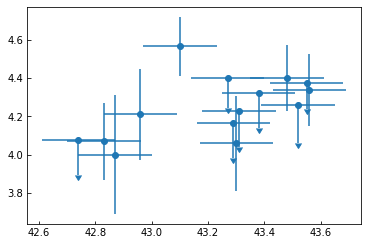

In [11]:
liu13_L = liu2013['L_OIII'].data
liu13_L_err = np.full_like(liu13_L, 0.3/np.log(10)) # 30% uncertainty for type2 AGNs
liu13_r = liu2013_corr['logR_fsb2_orig'].data 
liu13_r_err = liu2013_corr['logR_fsb2_orig_err'].data + 0.2/np.log(10)

liu13_islimit = liu2013_corr['is_limit'].data == 1
liu13_islimit = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=bool) | liu13_islimit
liu13_r[liu13_islimit] = liu2013_corr['logR_fsb1'].data[liu13_islimit]

if True:
    plt.errorbar(liu13_L, liu13_r, xerr=liu13_L_err, yerr=liu13_r_err, marker='o', ls='None', 
                 uplims=liu13_islimit)

### Liu2014 

In [ ]:
liu2014 = Table.read('data/Liu2014.txt', format='ascii')
liu2014[:4]

In [ ]:
liu2014['z'].data

In [ ]:
liu14_L = liu2014['L_OIII'].data
liu14_L_err = np.full_like(liu14_L, 0.1/np.log(10)) # 10% uncertainty for type1 AGNs
liu14_r = np.log10(liu2014['R_int'].data * 1000)
liu14_r_err = np.full_like(liu14_r, 0.2/np.log(10))
liu14_islimit = np.full(liu14_r.shape, False)
#liu14_L = liu14_L.tolist()
#liu14_r = liu14_r.tolist()
#liu14_r_err = liu14_r_err.tolist()

if True:
    plt.errorbar(liu14_L, liu14_r, xerr=liu14_L_err, yerr=liu14_r_err, marker='o', ls='None')

In [ ]:
from astropy.io import fits
from scipy.ndimage import binary_closing, binary_opening
from matplotlib import colors
from photutils.isophote import Ellipse, EllipseSample
from photutils.isophote import EllipseGeometry
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
from photutils import EllipticalAperture

# get the PSF profile from the standard star
hdu_star = fits.open('data/Liu2014/star.fits')
flux_star = hdu_star[0].data

x0 = np.arange(0, flux_star.shape[1])
y0 = np.arange(0, flux_star.shape[0])

sma, eps, pa = 5., 0.1, 0
geometry = EllipseGeometry(x0=x0.mean(), y0=y0.mean(), sma=sma, eps=eps, pa=pa)
ellipse = Ellipse(flux_star, geometry, threshold=0.01)
isolist = ellipse.fit_image(linear=True, step=0.1)#, sclip=2., nclip=3)

## Save to file
if True:
    hdr = fits.Header()
    hdr['AUTHOR'] = 'Jianhang Chen'
    hdr['DATE'] = '{}'.format(today)
    hdr['COMMENT'] = "Ellipse fittting of the standard star from Liu 2014"

    c1 = fits.Column(name='SMA', array=isolist.sma, format='D') # double float
    c2 = fits.Column(name='INTENS', array=isolist.intens, format='D') # doubel float
    c3 = fits.Column(name='INT_ERR', array=isolist.int_err, format='D') # double float
    bintable_hdu = fits.BinTableHDU.from_columns([c1, c2, c3], 
                                                 name=obj, header=hdr)
    #hdus = fits.HDUList([hdr_bin])
    bintable_hdu.writeto('data/Liu2014/star_ell.fits', overwrite=True)

In [ ]:
liustar_2014 = Table.read('data/Liu2014/star_ell.fits')
#liustar_2014
#plt.plot(isolist.sma, isolist.intens)
plt.plot(liustar_2014['SMA'], liustar_2014['INTENS'], 'ko')

In [ ]:
if True:#liu2013_psf:
    x = liustar_2014['SMA'] * 0.1 * psf * 0.145779 / 0.6
    y = tab_star['INTENS']/max(tab_star['INTENS'])
    g_init1 = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1)
    g_init2 = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1) + models.Gaussian1D(amplitude=0.1, mean=0, stddev=1)
    fit_g1 = fitting.LevMarLSQFitter()
    fit_g2 = fitting.LevMarLSQFitter()
    g1 = fit_g1(g_init1, x, y)
    g2 = fit_g1(g_init2, x, y)
    #print(g1.parameters)
    #print(g.stddev.value * 2.355 )
    #liu2013_psf_FWHM.append(g.stddev_1.value * 2.35482)
if 1:
    plt.figure()
    plt.semilogy(x, y, 'ko')
    #plt.plot(x, psf_new(x, g.parameters), 'r', lw=4)
    plt.plot(x, g1(x), label='One Gaussian')
    plt.plot(x, g2(x), label='Two Gaussian')
    plt.ylim(0.01, 1.1)
    plt.legend()

In [ ]:
# take JJ0149-0048 as an example
from astropy.modeling import models, fitting

liu2014_psf = np.array([2.9,3.2,3.95,2.7,3.5,3.3,4.1,4.3,3.3,4.8,3.7,3.1])
liu2014_psf_FWHM = []

#plt.semilogy(tab_star['SMA'] * 0.1 * 3.4 * 0.145779 / 0.6, tab_star['INTENS']/max(tab_star['INTENS']), ':')
for psf in liu2014_psf:
    x = isolist.sma * 0.1 * psf * 0.1456 / 0.508
    y = isolist.intens/max(isolist.intens)
    g_init = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1)
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, x, y)
    #print(g.stddev.value * 2.355 )
    liu2014_psf_FWHM.append(g.stddev.value * 2.35482)
if 0:
    plt.figure()
    plt.semilogy(x, y, 'ko')
    plt.plot(x, g(x), label='model')
    plt.ylim(0.01, 1.1)
print(liu2014_psf_FWHM)

In [ ]:
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                           geometry.sma*(1 - geometry.eps),
                           geometry.pa)
plt.imshow(flux_star, origin='lower')
aper.plot(color='white')

In [ ]:
tab_obj = Table.read('data/Liu2014/{}.fits'.format('J0304'))
r = tab_obj['SMA'] * 0.1 
I = tab_obj['INTENS']
I_err = tab_obj['INT_ERR']
plt.semilogy(r, I, 'ko')
plt.errorbar(r, I, yerr=I_err)
#print(I/I_err)

In [ ]:
# reproduce the results of Liu2014

cosmo = LambdaCDM(71, 0.27, 0.73)
SB = 100

liu2014_obj = np.array(['J0233','J0304','J0311','J0412','J0753','J0809','J0847','J0909','J0924','J0935',
                        'J1144','J2214'])
liu2014_z = np.array([0.4538, 0.6385, 0.633 , 0.5492, 0.4938, 0.6527, 0.5662, 0.5749, 0.5884, 0.6864, 
                      0.6785, 0.4752])
liu2014_pk = np.array([2.45, 0.85, 1.03, 9.51, 0.72, 1.39, 0.44, 0.93, 1.39, 0.63, 0.87, 1.74])
for idx, obj in enumerate(liu2014_obj[:]):
    psf = liu2014_psf_FWHM[idx]
    z = liu2014_z[idx]
    sb_corr = (1 + z)**4
    arcsec2kpc = cosmo.kpc_comoving_per_arcmin(z).to(u.kpc/u.arcsec)
    tab_obj = Table.read('data/Liu2014/dat/{}/o3lp.fits'.format(obj))
    #plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])
    r = tab_obj['SMA'] * 0.1
    I = tab_obj['INTENS'] * 1e3
    I_pk = liu2014_pk[idx] * 1e3
    I_err = tab_obj['INT_ERR']
    I_err[0] = I_err[1] # fix the nan
    valid = (I/I_err > 5)
    r = r[valid]
    I = I[valid]
    I_err = I_err[valid] #* sb_corr
    I = I * I_pk / np.max(I)
    r_extend = np.linspace(r.min(), 5*r.max(), 5000)
    I_extend = np.interp(r_extend, r, I)
    R15 = np.max(r_extend[I_extend > SB])
    logR15 = np.log10(R15 * arcsec2kpc.value*1000)
    print(z, np.max(I), R15*arcsec2kpc.value, logR15, np.min(snr))
    #print(max(I))

In [ ]:
cosmo = LambdaCDM(71, 0.27, 0.73)
SB = 10

liu2014_obj = np.array(['J0233','J0304','J0311','J0412','J0753','J0809','J0847','J0909','J0924','J0935',
                        'J1144','J2214'])
liu2014_z = np.array([0.4538, 0.6385, 0.633 , 0.5492, 0.4938, 0.6527, 0.5662, 0.5749, 0.5884, 0.6864, 
                      0.6785, 0.4752])
for idx, obj in enumerate(['J0304']):#liu2014_obj[:]):
    psf = liu2014_psf_FWHM[idx]
    z = liu2014_z[idx]
    sb_corr = (1 + z)**4
    with fits.open('data/Liu2014/dat/{}/nonpar/flx.fits'.format(obj)) as hdu:
        flux = hdu[0].data
    #LO3 = np.log10(O3_agn*1e-17/u.cm**2*4*np.pi*(m.d**2).to(u.cm**2))
    #plt.imshow(flux, vmax=10)
    plt.imshow(flux, norm=colors.LogNorm(vmin=0.1, vmax=2), cmap='Oranges', origin='low')
    plt.colorbar()

#### Ellipse fitting

In [ ]:
from astropy.io import fits
from scipy.ndimage import binary_closing, binary_opening
from matplotlib import colors
from photutils.isophote import Ellipse, EllipseSample
from photutils.isophote import EllipseGeometry
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
from photutils import EllipticalAperture

quiet = True
hdr = fits.Header()
hdr['AUTHOR'] = 'Jianhang Chen'
hdr['DATE'] = '{}'.format(today)
hdr['COMMENT'] = "Ellipse fittting of the [OIII] surface brightness isophote for the unobscured QSOs from Liu 2014"
primary_hdu = fits.PrimaryHDU(header=hdr)

hdu_list = [primary_hdu]

liu2014_obj = ['J0233','J0304','J0311','J0412','J0753','J0809','J0847','J0909','J0924','J0935','J1144','J2214']
for obj in liu2014_obj: #['J0233','J0304']:#
    print(obj, '-----------------------')
    with fits.open('data/Liu2014/dat/{}/nonpar/flx.fits'.format(obj)) as hdu:
        flux = hdu[0].data

    x0 = np.arange(0, flux.shape[1])
    y0 = np.arange(0, flux.shape[0])

    fitted = 0
    if 1: # auto just the paremeter
        for sma in np.arange(5, 2, -0.3):
            for eps in np.arange(0.2, 1., 0.3):
                for pa in np.arange(0, np.pi, 0.5):
                    print("Parameter:", sma, eps, pa)
                    geometry = EllipseGeometry(x0=x0.mean(), y0=y0.mean(), sma=sma, eps=eps, pa=pa)
                    ellipse = Ellipse(flux, geometry, threshold=0.01)
                    #try: # some may failed to fit
                    isolist = ellipse.fit_image(linear=True, step=0.1)#, sclip=2., nclip=3)
                    #except:
                    #    # continue
                    #    print("len(intens):", len(isolist.intens))
                    if len(isolist.intens) > 5:
                        fitted = True
                        init = [sma, eps, pa]
                        break
                if fitted:
                    break
            if fitted:
                break
        if not fitted:
            if not quiet:
                print("auto fit failed")
        hdr_bin = fits.Header()
        c1 = fits.Column(name='sma', array=isolist.sma, format='D') # double float
        c2 = fits.Column(name='intens', array=isolist.intens, format='D') # doubel float
        c3 = fits.Column(name='int_err', array=isolist.int_err, format='D') # double float
        bintable_hdu = fits.BinTableHDU.from_columns([c1, c2, c3], 
                                                     name=obj, header=hdr_bin)
        hdu_list.append(bintable_hdu)
    if 0:
        sma, eps, pa = 5., 0.5, 1.6
        geometry = EllipseGeometry(x0=x0.mean(), y0=y0.mean(), sma=sma, eps=eps, pa=pa)
        ellipse = Ellipse(flux, geometry, threshold=0.01)
        isolist = ellipse.fit_image(linear=True, step=0.1)#, sclip=2., nclip=3)
    plt.figure()
    #plt.semilogy(isolist.sma, isolist.intens, 'ko')
    plt.errorbar(isolist.sma, isolist.intens, yerr=isolist.int_err, marker='.', linestyle='None')
    
hdus = fits.HDUList(hdu_list)
hdus.writeto('data/Liu2014_EllispeFitting-{}.fits'.format(today), overwrite=True)
print('Done! Write into file data/Liu2014_EllipseFitting-{}.fits'.format(today))

In [ ]:
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                           geometry.sma*(1 - geometry.eps),
                           geometry.pa)
plt.imshow(flux, origin='lower')
aper.plot(color='white')

In [ ]:
#plt.plot(isolist.sma, isolist.intens, 'ko')
plt.errorbar(isolist.sma, isolist.intens, yerr=isolist.int_err, marker='.', linestyle='None')

In [ ]:
hdu = fits.open('data/Liu2014_EllispeFitting-2019-04-17.fits')
tab_tmp = hdu[2].data
plt.errorbar(tab_tmp['SMA'], tab_tmp['INTENS'], yerr=tab_tmp['INT_ERR'], marker='.', linestyle='None')

In [ ]:
liu_lp = Table.read('data/Liu2014/dat/J0304/o3lp.fits')
#plt.plot(liu_lp['SMA'], liu_lp['INTENS'], 'ko')
plt.errorbar(liu_lp['SMA'], liu_lp['INTENS'], yerr=liu_lp['INT_ERR'], marker='.', linestyle='None')

#### fit the sersic

In [ ]:
# Statistics, One Gaussian PSF
# History:
#    2019-04-10: Follow the same method we used to analyse the data of Liu2014

# global value
import numpy as np
from scipy import optimize, signal
from matplotlib import pyplot as plt
from astropy.cosmology import LambdaCDM
from astropy import units as u
import matplotlib.backends.backend_pdf as mpdf

def psf_func(r, amplitude=0, mean=0, stddev=0):
    return amplitude * np.exp(-(r-mean)**2/(2*stddev**2))

def psf_kernel(fwhm, interv=1, data_points=50):
    edge = data_points/(2*interv)
    r = np.arange(-edge, edge+interv, interv)
    sigma = fwhm/2.35482
    return np.exp(-r**2/(2*sigma**2))

def fmodel_conv(x, r, basemodel, psf_fwhm=None, points=50, scale_factor=1.5):
    # used for convolution
    r_interp = np.linspace(r.min(), 1.5*r.max(), points)
    flux = basemodel(x, r_interp)
    psf = psf_kernel(psf_fwhm, r_interp[1]-r_interp[0])
    flux_sym = np.array([flux[::-1], flux]).flatten()
    flux_conv = signal.fftconvolve(flux_sym, psf, mode='same')/np.sum(psf)
    return np.interp(r, r_interp, flux_conv[len(flux_sym)//2:])


plot = True
save = False
SB = 10
sample_times = 5
quiet = True
cosmo = LambdaCDM(70, 0.3, 0.7)

excess_num = 0
undetect = 0

liu2014_obj = np.array(['J0233','J0304','J0311','J0412','J0753','J0809','J0847','J0909','J0924','J0935',
                        'J1144','J2214'])
liu2014_dec = np.array(['-0743','+0022','-0707','-0511','+3153','+0743','+2940','+3459','+0642','+5348',
                        '+1043','+2115'])
liu2014_z = np.array([0.4538, 0.6385, 0.633 , 0.5492, 0.4938, 0.6527, 0.5662, 0.5749, 0.5884, 0.6864, 
                      0.6785, 0.4752])
peak = np.array([2.45, 0.85, 1.03, 9.51, 0.72, 1.39, 0.44, 0.93, 1.39, 0.63, 0.87, 1.74])


if plot: #plot into file
    pdf = mpdf.PdfPages('results/liu2014_checkfit-{}.pdf'.format(today))

if save: #save fitting results into file
    fsb_file = open('data/liu2014_R_fsb-{}.dat'.format(today), 'w')
    fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
        'plateifu', 'logR_fsb1', 'logR_fsb1_err', 'logR_fsb2', 'logR_fsb2_err', \
        'logR_fsb2_orig', 'logR_fsb2_orig_err', 'is_limit'))
for idx, obj in enumerate(liu2014_obj[:]):
    psf = liu2014_psf_FWHM[idx]
    z = liu2014_z[idx]
    sb_corr = (1 + z)**4
    arcsec2kpc = cosmo.kpc_comoving_per_arcmin(z).to(u.kpc/u.arcsec)
    if 0:
        tab_obj = Table.read('data/Liu2014/dat/{}/o3lp.fits'.format(obj))
        #plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])
        r = tab_obj['SMA'] * 0.1 
        I = tab_obj['INTENS']
        I_err = tab_obj['INT_ERR']
        I_err[0] = I_err[1] # fix the nan
        valid = (I/I_err > 5)
        r = r[valid]
        I = I[valid]
        I_err = I_err[valid]
        logI = np.log(I)
        logI_err = I_err/I
        
    if 1:
        with fits.open('data/Liu2014_EllispeFitting-2019-04-17.fits') as f:
            data = f[obj].data
            # ignore the first point
            r = data['sma'] * 0.1
            I = data['intens'] * 1e3
            I_err = data['int_err']
            I_err[0] = I_err[1] 
            valid = (I > 0.1) & (I/I_err > 5)
            r = r[valid]
            I = I[valid]
            print('I min:', I.min())
            I_err = I_err[valid]
            logI = np.log(I)
            logI_err = I_err/I
    # define the model
    baseModel_1 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2]))
    #baseModel_1 = lambda x, r: np.exp(x[0] + x[1] * r)
    
    #********* fit without de-convlolution *************#
    # initial value and bounds
    x0 = (logI.max(), 1, 1)
    bounds=((0, np.inf), (0.01, 10), (0.5, 10))
    
    # used the logscale of y, to optimize the fitting
    cost_fun1 = lambda x, r, logy, logy_err: \
                np.sum((np.log(baseModel_1(x, r)) - logy)**2/(logy_err)**2)
    res_lsq1 = optimize.minimize(cost_fun1, x0,
                                 args=(r, logI, logI_err),
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds)
    print(res_lsq1.x)
    
    #*********** fit with de-convolution ****************#
    baseModel_2 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2])) #+ np.exp(x[3] - x[4] * r**(1/x[5]))
    # initial value and bounds
    x0_2 = (logI.max(), 1, 1)#, logI.max()/2, 1, 1)
    bounds_2=((0, np.inf), (0.01, 10), (0.5, 10))#, (0, np.inf), (0.01, 10), (0.5, 10))
    
    cost_fun2 = lambda x, r, logy, logy_err, basemodel, psf_fwhm: \
                np.sum((np.log(fmodel_conv(x, r, basemodel, psf_fwhm)) - logy)**2/logy_err**2)
    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                 args=(r, logI, logI_err, baseModel_2, psf), 
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds_2)
    print(res_lsq2.x)
    
    if save: # save fitted results into file
        r_extend = np.linspace(r.min(), r.max(), 50) # for smooth plot
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, psf)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        #print(gg_fit1*sb_corr)
        R_fsb1 = np.max(r_extend[sb_corr*gg_fit1 > SB])
        R_fsb2 = np.max(r_extend[sb_corr*gg_fit2 > SB])
        R_fsb2_orig = np.max(r_extend[sb_corr*gg_fit2_orig > SB])
        logR_fsb1 = np.log10(R_fsb1 * arcsec2kpc.value*1000)
        logR_fsb1_err = .5/R_fsb1/np.log(10)
        logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
        logR_fsb2_err = .5/R_fsb2/np.log(10)
        logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
        logR_fsb2_orig_err = .5/R_fsb2_orig/np.log(10)
        
        #if ((np.abs(res_lsq2.x[1] - 10) < 1e-8) or (np.abs(res_lsq2.x[2] - 10) < 1e-8)
        #    or (np.abs(res_lsq2.x[2] - 0.5) < 1e-8)):
        #    is_limit = 1
        #    logR_fsb2_err = .1
        #    logR_fsb2_orig_err = .1
        #else:
        #    is_limit = 0
        is_limit = 0
        
            
        if not is_limit: # resample to get the fitting error
            R_list = []
            R_orig_list = []
            r_extend = np.linspace(r.min(), r.max(), 50)
            failed_times = 0
            for i in range(sample_times):
                logI = np.log(I + I_err*np.random.randn(len(I)))
                logI_err = I_err/I
                
                try:
                    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                                 args=(r, logI, logI_err, baseModel_2, psf), 
                                                 method='L-BFGS-B', options={'disp':False},
                                                 jac='2-point', bounds=bounds_2)
                    gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, psf)
                    gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
                    #print("gg_fit2", gg_fit2)
                    R_fsb2 = np.max(r_extend[sb_corr*gg_fit2 > SB])
                    logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
                    R_fsb2_orig = np.max(r_extend[sb_corr*gg_fit2_orig > SB])
                    logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
                    
                except:
                    print("Resmaple fitting failed {}th times!".format(failed_times+1))
                    failed_times += 1
                    continue
                R_list.append(logR_fsb2)
                R_orig_list.append(logR_fsb2_orig)

                
            logR_fsb2 = np.mean(R_list)
            logR_fsb2_err += np.std(R_list)
            logR_fsb2_orig = np.mean(R_orig_list)
            logR_fsb2_orig_err += np.std(R_orig_list)
        if not quiet:    
            print('{} {:.2f} {:.2f} {:.2f} {:.2f} {}'.format(idx+1, logR_fsb2, logR_fsb2_err, 
                   logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
        fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
            obj, logR_fsb1, logR_fsb1_err, logR_fsb2, logR_fsb2_err, \
            logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
    
    if plot:
        # generate data for plot 
        r_extend = np.linspace(r.min(), 2*r.max(), 50) # for smooth plot
        gauss_psf = psf_func(r_extend, amplitude=I.max(), mean=0, stddev=psf/2.35482)

        fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

        # show the results of without de-convolution
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        ax = ax_list[0]
        ax.set_title('without de-convolution')
        ax.semilogy(r, sb_corr * I, 'ko')
        ax.errorbar(r, sb_corr * I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, sb_corr * gauss_psf, 'k--', label='PSF')
        ax.plot(r_extend, sb_corr * gg_fit1, label='single')
        ax.legend()
        ax.set_ylim(I.min(), 1.2*sb_corr*I.max())

        # show the results after convolution
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, psf)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        ax = ax_list[1]
        ax.set_title('with de-convolution')
        ax.semilogy(r, sb_corr * I, 'ko')
        ax.plot(r_extend, sb_corr * gauss_psf, 'k--', label='PSF')
        ax.errorbar(r, sb_corr * I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, sb_corr * gg_fit2, label='after')
        ax.plot(r_extend, sb_corr * gg_fit2_orig, label='before')
        ax.set_ylim(I.min(), 2*sb_corr*I.max())
        ax.legend()

        pdf.savefig(fig)
        plt.close(fig)

if plot:
    pdf.close()
    %matplotlib inline
if save:
    print("save into file {}".format(fsb_file.name))
    fsb_file.close()

In [ ]:
# Statistics, two gaussian modeled psf
# History:
#    2019-04-09: Follow the same method we used to analyse the data of Liu2014

# global value
import numpy as np
from scipy import optimize, signal
from matplotlib import pyplot as plt
from astropy.cosmology import LambdaCDM
from astropy import units as u
import matplotlib.backends.backend_pdf as mpdf
from astropy.modeling import models, fitting

def psf_new(r, params):
    # multiple gaussian modeled psf
    y = 0
    for i in range(0, len(params), 3):
        y = y + params[i+0]* np.exp( -(r - params[i+1])**2/(2*params[i+2]**2))
    return y

def psf_kernel_new(params, interv=1, data_points=200):
    edge = data_points/(2*interv)
    r = np.arange(0, edge+interv, interv)
    y = 0
    for i in range(0, len(params), 3):
        y = y + params[i+0]* np.exp(-(r - params[i+1])**2/(2*params[i+2]**2))
    return y

def fmodel_conv(x, r, basemodel, psf_params=None, points=50, scale_factor=1.5):
    # used for convolution
    r_interp = np.linspace(r.min(), 1.5*r.max(), points)
    flux = basemodel(x, r_interp)
    psf = psf_kernel_new(psf_params, r_interp[1]-r_interp[0])
    psf_sym = np.array([psf[::-1], psf]).flatten()
    flux_sym = np.array([flux[::-1], flux]).flatten()
    flux_conv = signal.fftconvolve(flux_sym, psf_sym, mode='same')/(np.sum(psf_sym))
    return np.interp(r, r_interp, flux_conv[len(flux_sym)//2:])


plot = True
save = True
SB = 100
sample_times = 10
quiet = True
cosmo = LambdaCDM(70, 0.3, 0.7)

excess_num = 0
undetect = 0

liu2014_obj = np.array(['J0233','J0304','J0311','J0412','J0753','J0809','J0847','J0909','J0924','J0935',
                        'J1144','J2214'])
liu2014_dec = np.array(['-0743','+0022','-0707','-0511','+3153','+0743','+2940','+3459','+0642','+5348',
                        '+1043','+2115'])
liu2014_psf = np.array([2.9,3.2,3.95,2.7,3.5,3.3,4.1,4.3,3.3,4.8,3.7,3.1])
liu2014_z = np.array([0.4538, 0.6385, 0.633 , 0.5492, 0.4938, 0.6527, 0.5662, 0.5749, 0.5884, 0.6864, 
                      0.6785, 0.4752])
peak = np.array([2.45, 0.85, 1.03, 9.51, 0.72, 1.39, 0.44, 0.93, 1.39, 0.63, 0.87, 1.74])

# for the standard star
tab_star = Table.read('data/Liu2014/star_ell.fits')
star_r_base = tab_star['SMA'] * 0.1 * 0.1456 / 0.508
star_I = tab_star['INTENS']/max(tab_star['INTENS'])

if plot: #plot into file
    pdf = mpdf.PdfPages('results/liu2014_checkfit-{}-{}.pdf'.format(SB, today))

if save: #save fitting results into file
    fsb_file = open('data/liu2014_R_fsb-{}-{}.dat'.format(SB, today), 'w')
    fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
        'plateifu', 'logR_fsb1', 'logR_fsb1_err', 'logR_fsb2', 'logR_fsb2_err', \
        'logR_fsb2_orig', 'logR_fsb2_orig_err', 'is_limit'))
for idx, obj in enumerate(liu2014_obj):
    # get the PSF profile
    star_r = star_r_base * liu2014_psf[idx]
    g_init = models.Gaussian1D(amplitude=1, mean=0, stddev=0.1) + models.Gaussian1D(amplitude=1, mean=0, stddev=1)
    fit_g = fitting.LevMarLSQFitter()
    g_star = fit_g(g_init, star_r, star_I)
    params = g_star.parameters
    
    # ready for fitting
    z = liu2014_z[idx]
    sb_corr = (1 + z)**4
    Ip = peak[idx] * 1000
    arcsec2kpc = cosmo.kpc_comoving_per_arcmin(z).to(u.kpc/u.arcsec)
    
    # read ellipse isophote data
    if 1:
        tab_obj = Table.read('data/Liu2014/dat/{}/o3lp.fits'.format(obj))
        #plt.semilogy(tab_obj['SMA'] * 0.1, tab_obj['INTENS'])
        r = tab_obj['SMA'] * 0.1 
        I = tab_obj['INTENS'] * 1e3
        I_err = tab_obj['INT_ERR'] * 1e3
        I_err[0] = I_err[1] # fix the nan
        valid = (I/I_err > 5)
        r = r[valid]
        I = I[valid]
        I_err = I_err[valid]
        I = I / np.max(I) * Ip
        I_err = I_err / np.max(I) * Ip
        logI = np.log(I)
        logI_err = I_err/I
        
    if 0:
        with fits.open('data/Liu2014_EllispeFitting-2019-04-17.fits') as f:
            data = f[obj].data
            # ignore the first point
            r = data['sma'] * 0.1
            I = data['intens'] * 1e3
            I_err = data['int_err']
            I_err[0] = I_err[1] 
            valid = (I/I_err > 5)
            r = r[valid]
            I = I[valid]
            I_err = I_err[valid]
            #print('I min:', I.min())
            I = I * Ip / np.max(I) #* sb_corr
            I_err = I_err * Ip / np.max(I) #* sb_corr
            logI = np.log(I)
            logI_err = I_err/I

    # define the model
    baseModel_1 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2]))
    #baseModel_1 = lambda x, r: np.exp(x[0] + x[1] * r)
    
    #********* fit without de-convlolution *************#
    # initial value and bounds
    x0 = (logI.max(), 1, 1)
    bounds=((0, np.inf), (0.01, 10), (0.5, 10))
    
    # used the logscale of y, to optimize the fitting
    cost_fun1 = lambda x, r, logy, logy_err: \
                np.sum((np.log(baseModel_1(x, r)) - logy)**2/(logy_err)**2)
    res_lsq1 = optimize.minimize(cost_fun1, x0,
                                 args=(r+np.random.randn(len(r))*1e-8, logI, logI_err),
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds)
    print(res_lsq1.x)
    
    #*********** fit with de-convolution ****************#
    baseModel_2 = lambda x, r: np.exp(x[0] - x[1] * r**(1/x[2])) #+ np.exp(x[3] - x[4] * r**(1/x[5]))
    # initial value and bounds
    x0_2 = (logI.max(), 1, 1)#, logI.max()/2, 1, 1)
    bounds_2=((0, np.inf), (0.01, 10), (0.5, 10))#, (0, np.inf), (0.01, 10), (0.5, 10))
    
    cost_fun2 = lambda x, r, logy, logy_err, basemodel, psf_params: \
                np.sum((np.log(fmodel_conv(x, r, basemodel, psf_params)) - logy)**2/logy_err**2)
    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                 args=(r, logI, logI_err, baseModel_2, params), 
                                 method='L-BFGS-B', options={'disp':False},
                                 jac='2-point', bounds=bounds_2)
    print(res_lsq2.x)
    
    if save: # save fitted results into file
        print(r.min(), r.max())
        r_extend = np.linspace(0, 2*r.max(), 1000) # for smooth plot
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, params)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        #print(gg_fit2_orig)
        R_fsb1 = np.max(r_extend[gg_fit1 > SB])
        R_fsb2 = np.max(r_extend[gg_fit2 > SB])
        R_fsb2_orig = np.max(r_extend[gg_fit2_orig > SB])
        logR_fsb1 = np.log10(R_fsb1 * arcsec2kpc.value*1000)
        logR_fsb1_err = .5/R_fsb1/np.log(10)
        logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
        logR_fsb2_err = .5/R_fsb2/np.log(10)
        logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
        logR_fsb2_orig_err = .5/R_fsb2_orig/np.log(10)
        
        if ((np.abs(res_lsq2.x[1] - 10) < 1e-8) or (np.abs(res_lsq2.x[2] - 10) < 1e-8)
            or (np.abs(res_lsq2.x[2] - 0.5) < 1e-8)):
            is_limit = 1
            logR_fsb2_err = .1
            logR_fsb2_orig_err = .1
        else:
            is_limit = 0
        #is_limit = 0
            
        if not is_limit: # resample to get the fitting error
            R_list = []
            R_orig_list = []
            failed_times = 0
            for i in range(sample_times):
                logI = np.log(I + I_err*np.random.randn(len(I)))
                logI_err = I_err/I
                
                try:
                    res_lsq2 = optimize.minimize(cost_fun2, x0_2,
                                                 args=(r, logI, logI_err, baseModel_2, params), 
                                                 method='L-BFGS-B', options={'disp':False},
                                                 jac='2-point', bounds=bounds_2)
                    gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, params)
                    gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
                    #print("gg_fit2", gg_fit2)
                    R_fsb2 = np.max(r_extend[gg_fit2 > SB])
                    logR_fsb2 = np.log10(R_fsb2 * arcsec2kpc.value*1000)
                    R_fsb2_orig = np.max(r_extend[gg_fit2_orig > SB])
                    logR_fsb2_orig = np.log10(R_fsb2_orig * arcsec2kpc.value*1000)
                    
                except:
                    print("Resmaple fitting failed {}th times!".format(failed_times+1))
                    failed_times += 1
                    continue
                if np.isfinite(logR_fsb2) & np.isfinite(logR_fsb2_orig):
                    R_list.append(logR_fsb2)
                    R_orig_list.append(logR_fsb2_orig)

                
            logR_fsb2 = np.mean(R_list)
            logR_fsb2_err += np.std(R_list)
            logR_fsb2_orig = np.mean(R_orig_list)
            
            logR_fsb2_orig_err += np.std(R_orig_list)
        if not quiet:    
            print('{} {:.2f} {:.2f} {:.2f} {:.2f} {}'.format(idx+1, logR_fsb2, logR_fsb2_err, 
                   logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
        fsb_file.write("{} {} {} {} {} {} {} {}\n".format(
            obj, logR_fsb1, logR_fsb1_err, logR_fsb2, logR_fsb2_err, \
            logR_fsb2_orig, logR_fsb2_orig_err, is_limit))
    
    if plot:
        # generate data for plot 
        r_extend = np.linspace(r.min(), 2*r.max(), 100) # for smooth plot
        gauss_psf = I.max() * psf_new(r_extend, params)

        fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

        # show the results of without de-convolution
        gg_fit1 = baseModel_1(res_lsq1.x, r_extend)
        ax = ax_list[0]
        ax.set_title('without de-convolution')
        ax.semilogy(r, I, 'ko')
        ax.errorbar(r, I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, gauss_psf, 'k--', label='PSF')
        ax.plot(r_extend, I.max() * g_star(r_extend), 'r--', label='PSF_fit')
        ax.plot(r_extend, gg_fit1, label='single')
        ax.axhline(y=SB, linestyle='-.', color='r')
        ax.legend()
        ax.set_xlim(-0.1, 1.5*np.max(r))
        ax.set_ylim(I.min(), 1.2*I.max())

        # show the results after convolution
        gg_fit2 = fmodel_conv(res_lsq2.x, r_extend, baseModel_2, params)
        gg_fit2_orig = baseModel_2(res_lsq2.x, r_extend)
        ax = ax_list[1]
        ax.set_title('with de-convolution')
        ax.semilogy(r, I, 'ko')
        ax.plot(r_extend, gauss_psf, 'k--', label='PSF')
        ax.errorbar(r, I, yerr=I_err, marker='None', linestyle='None', color='k')
        ax.plot(r_extend, gg_fit2, label='after')
        ax.plot(r_extend, gg_fit2_orig, label='before')
        ax.axhline(y=SB, linestyle='-.', color='r')
        ax.set_ylim(I.min(), 1.2*I.max())
        #ax.set_xlim(-0.1, 2.5)
        ax.set_xlim(-0.1, 1.5*np.max(r))
        ax.legend()

        pdf.savefig(fig)
        plt.close(fig)

if plot:        
    pdf.close()
    %matplotlib inline
if save:
    print("save into file {}".format(fsb_file.name))
    fsb_file.close()

#### Liu2014 (read products)

In [12]:
SB = 10 # surface brightness
liu2014 = Table.read('data/Liu2014.txt', format='ascii')
liu2014_corr = Table.read('data/liu2014_R_fsb-{}-2019-06-25.dat'.format(SB), format='ascii')
liu2014_islimit = liu2014_corr['is_limit'].data == 1
#liu2013[:2]
liu2014_corr[:]

plateifu,logR_fsb1,logR_fsb1_err,logR_fsb2,logR_fsb2_err,logR_fsb2_orig,logR_fsb2_orig_err,is_limit
str5,float64,float64,float64,float64,float64,float64,int64
J0233,4.2551442746963835,0.10152462243312725,4.227468010841585,0.11445527820689559,4.145301586869734,0.1414138072074556,0
J0304,4.19485028366854,0.15619471602210255,4.188240591565526,0.1633355143292515,3.0208879090059124,1.2217092334712567,0
J0311,4.228149693292181,0.14363257944947339,4.249060687654164,0.1,3.0839648128999455,0.1,1
J0412,4.319041546402161,0.10338867323882946,4.319943146842246,0.12171434917828262,4.17976245554546,0.22951571068479987,0
J0753,4.099441236241367,0.15643500859224518,4.099441236241367,0.1,2.712496611870792,0.1,1
J0809,4.307491068652712,0.12272055638786424,4.328780499847715,0.122318695040765,4.178248189626842,0.17857035293990553,0
J0847,4.227759420953734,0.1309220028990893,4.201600649698587,0.15264434219593856,4.007347005649098,0.3338566116521454,0
J0909,4.269703322801755,0.12041377901215249,4.287828534078099,0.11910463234166453,4.137849537700544,0.17090094770299225,0
J0924,4.173368465468519,0.15329058630898398,4.241871310084831,0.1,2.573485393394831,0.1,1


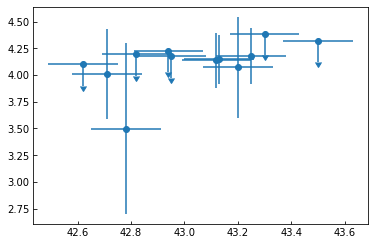

In [13]:
liu14_L = liu2014['L_OIII'].data
liu14_L_err = np.full_like(liu14_L, 0.3/np.log(10)) # 30% uncertainty for type2 AGNs

liu14_r = liu2014_corr['logR_fsb2_orig'].data
#liu14_valid = (liu14_r > 0)
liu14_r_err = liu2014_corr['logR_fsb2_orig_err'].data + 0.2/np.log(10)
liu14_islimit = liu2014_corr['is_limit'].data == 1
liu14_islimit = np.array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=bool) | liu14_islimit
liu14_r[liu14_islimit] = liu2014_corr['logR_fsb1'].data[liu14_islimit]
liu14_r_err[liu14_islimit] = 0.2
#liu14_L = liu14_L[liu14_valid]
#liu14_L_err = liu14_L_err[liu14_valid]
#liu14_r = liu14_r[liu14_valid]
#liu14_r_err = liu14_r_err[liu14_valid]

if True:
    plt.errorbar(liu14_L, liu14_r, xerr=liu14_L_err, yerr=liu14_r_err, marker='o', ls='None',
                 uplims=liu14_islimit)

In [ ]:
liu14_islimit

In [ ]:
liu14_islimit = np.array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=bool)

### Law2018

<ErrorbarContainer object of 3 artists>

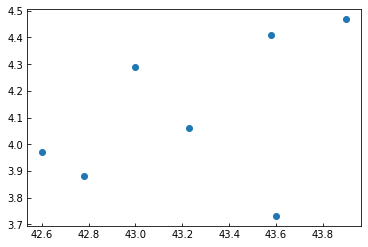

In [14]:
law18_L = np.array([43.58, 43.60, 43.90, 43.23, 43.00, 42.78, 42.60])
law18_r = np.array([4.41, 3.73, 4.47, 4.06, 4.29, 3.88, 3.97])
law18_islimit = np.array([0, 0, 0, 1, 0, 1, 1])

plt.errorbar(law18_L, law18_r, uplims=law18_islimit, linestyle='None', marker='o')

### This work

In [15]:
SB = 10
this_Ldata = Table.read('data/LO3-2019-06-25.dat', format="ascii")
#this_Rdata = Table.read('data/R_fsb-2019-04-29.dat', format='ascii')
this_Rdata = Table.read('data/R_fsb-({})-2019-06-19.dat'.format(SB), format='ascii')


/Users/cjhang/.local/miniconda3/envs/astro/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


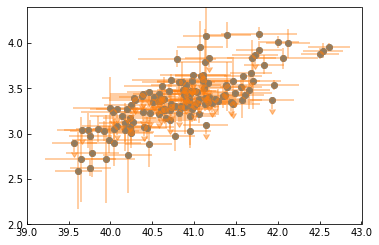

In [16]:
this_L = this_Ldata['LO3_redcorr'].data
this_L_err = 0.5 * (this_Ldata['LO3_redcorr_err_up'].data + this_Ldata['LO3_redcorr_err_low'].data)

this_r = this_Rdata['logR_fsb2_orig'].data
this_r_err = this_Rdata['logR_fsb2_orig_err'].data

this_islimit = this_Rdata['is_limit'].data == 1
#contaminate = (this_Rdata['agn_fraction'].data < 0.1) #& is_limit
unresolve = this_Rdata['agn_pixels'].data < 100
#excess = this_Rdata['excess'] == 1

this_r[this_islimit] = this_Rdata['logR_fsb1'].data[this_islimit]


if True:
    #plt.plot(this_L[not_limit], this_r[not_limit], 'o')
    #plt.plot(this_L[is_limit], this_r[is_limit], 'o')
    
    is_valid = (this_L > 38) & (this_L < 45) & (this_r > 2.0) & (this_r < 5.0) & (this_L_err < 0.5) & (this_r_err < 1) #& ~this_islimit
    this_L = this_L[is_valid]
    this_L_err = this_L_err[is_valid]
    this_r = this_r[is_valid]
    this_r_err = this_r_err[is_valid]
    this_islimit = this_islimit[is_valid]
    plt.plot(this_L, this_r, 'o')
    #plt.plot(this_L[contaminate], this_r[contaminate], 'o')
    #plt.plot(this_L[excess], this_r[excess], 'o')
    
    plt.errorbar(this_L, this_r, xerr=this_L_err, yerr=this_r_err, uplims=this_islimit, marker='o', ls='None', alpha=0.5)
    
    # account for the is_converge
    #this_L1 = this_L[is_converge]
    #this_L_err1 = this_L_err[is_converge]
    #this_r1 = this_r[is_converge]
    #this_r_err1 = yerr=this_r_err[is_converge]
    #is_limit1 = is_limit[is_converge]
    #plt.errorbar(this_L1, this_r1, xerr=this_L_err1, yerr=this_r_err1, uplims=is_limit1, marker='o', ls='None', alpha=0.5)
    
    #this_L2 = this_L[~is_converge]
    #this_L_err2 = this_L_err[~is_converge]
    #this_r2 = this_r[~is_converge]
    #this_r_err2 = yerr=this_r_err[~is_converge]
    #is_limit2 = is_limit[~is_converge]
    #plt.errorbar(this_L2, this_r2, xerr=this_L_err2, yerr=this_r_err2, uplims=is_limit2, marker='o', ls='None', alpha=0.5)
    
    plt.ylim(2.0, 4.4)
    plt.xlim(39, 43)
    
    #plt.errorbar(this_L[contaminate], this_r[contaminate], xerr=this_L_err[contaminate], yerr=this_r_err[contaminate], marker='o', ls='None', alpha=0.5, uplims=True)
    #plt.errorbar(this_L[unresolve], this_r[unresolve], xerr=this_L_err[unresolve], yerr=this_r_err[unresolve], marker='o', ls='None', alpha=0.5, lolims=True)

In [ ]:
np.sum(this_islimit)

In [ ]:
152 - np.sum(is_valid)

## Size-Luminosty relation

/Users/cjhang/.local/miniconda3/envs/astro/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/cjhang/.local/miniconda3/envs/astro/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Only our data: alpha: -16.444±1.505, beta: +0.482±0.037, sig^2: 0.009
All the data: alpha: -14.108±0.908, beta: +0.425±0.022, sig^2: 0.008


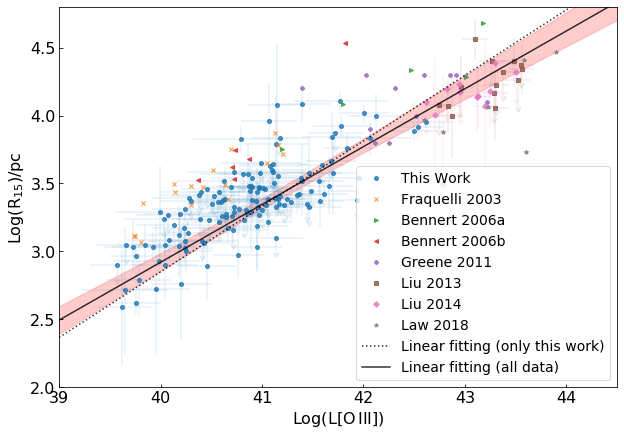

In [17]:
# Isophote
import numpy as np
import astropy.units as u
from astropy.table import Table
import matplotlib.pyplot as plt
from ltsfit.lts_linefit import lts_linefit
from mangatools import linmix

set_matplotlib_formats('png')

# preset for plot
fs = 16
lw = 2
ms = 4
pa = 0.8 # point alpha
ea = 0.1 #errorbar alpha

X_all = [] #include all the data points
X_all_err = []
Y_all = []
Y_all_err = []

X_ifu = [] #include just the ifu obervation
X_ifu_err = []
Y_ifu = []
Y_ifu_err = []
Y_delta = []

# default error, use for fitting
x_err_default = 0.2*np.log(10) # 30% error
y_err_default = 0.2*np.log(10) # 30% error

fig, ax = plt.subplots(1,1, figsize=(10, 7))
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.tick_params(axis='both', which='minor', labelsize=fs-1)

if 1: # plot data of this work
    color = 'C0'
    marker = 'o'
    ax.plot(this_L, this_r, marker=marker, alpha=pa, label='This Work', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(this_L, this_r, xerr=this_L_err, uplims=this_islimit,
                 yerr=this_r_err, ls='None', label=None, alpha=ea, color=color)
    #ax.plot(this_L1, this_r1, marker=marker, alpha=0.8, label='This Work', 
    #        color=color, lw=lw, ms=ms, linestyle='None')
    #plt.errorbar(this_L1, this_r1, xerr=this_L_err1, uplims=is_limit1,
    #             yerr=this_r_err1, ls='None', label=None, alpha=0.1, color=color)
    #ax.plot(this_L2, this_r2, marker=marker, alpha=0.3, 
    #        color=color, lw=lw, ms=ms, linestyle='None')
    #plt.errorbar(this_L2, this_r2, xerr=this_L_err2, uplims=is_limit2,
    #             yerr=this_r_err2, ls='None', label=None, alpha=0.1, color=color)
    # append data for fitting
    X_all.append(this_L)
    X_all_err.append(this_L_err)
    Y_all.append(this_r)
    Y_all_err.append(this_r_err)
    Y_delta.append(~this_islimit)
    

if 1: # plot fraqulli 2003
    color = 'C1'
    marker = 'x'
    ax.plot(fra03_L, fra03_r, marker=marker, alpha=pa, label='Fraquelli 2003', color=color, 
            lw=lw, ms=ms, linestyle='None')
    ax.errorbar(fra03_L, fra03_r, marker=marker, alpha=ea, label=None, color=color,
                linestyle='None')#, yerr=np.full_like(fra03_r), uplims=np.ones_like(fra03_r))
    if 1:
        # append data for fitting
        X_all.append(fra03_L)
        X_all_err.append(np.full_like(fra03_L, x_err_default)) # 30% error
        Y_all.append(fra03_r)
        Y_all_err.append(np.full_like(fra03_r, y_err_default))
        Y_delta.append(np.full_like(fra03_r, True))


if 1: # plot Bennert 2006a
    color = 'C2'
    marker = '>'
    ax.plot(ben06a_L, ben06a_r, marker=marker, alpha=pa, label='Bennert 2006a', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(ben06a_L, ben06a_r, ls='None', label=None, alpha=ea, color=color,)
                 #uplims=np.ones_like(ben06a_r) yerr=np.full_like(ben06a_r, 0.05))
    if 1:
        # append data for fitting
        X_all.append(ben06a_L)
        X_all_err.append(np.full_like(ben06a_L, x_err_default))
        Y_all.append(ben06a_r)
        Y_all_err.append(ben06a_r_err)
        Y_delta.append(np.full_like(ben06a_r, True))

if 1: # plot Bennert 2006b
    #ax.errorbar(ben06b_L, ben06b_r, yerr=ben06b_r_err, marker='o', linestyle='None', label='Bennert 2006b')
    color = 'C3'
    marker = '<'
    ax.plot(ben06b_L, ben06b_r, marker=marker, alpha=pa, label='Bennert 2006b', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(ben06b_L, ben06b_r, ls='None', label=None, alpha=ea, color=color,)
                 #yerr=np.full_like(ben06b_r, 0.05), uplims=np.ones_like(ben06b_r))
    if 1:
        # append data for fitting
        X_all.append(ben06b_L)
        X_all_err.append(np.full_like(ben06b_L, x_err_default))
        Y_all.append(ben06b_r)
        Y_all_err.append(ben06b_r_err)
        Y_delta.append(np.full_like(ben06b_r, True))
    
if 1: # plot greene 2011
    color = 'C4'
    marker = 'P'
    ax.plot(gre11_L, gre11_r, marker=marker, alpha=pa, label='Greene 2011', 
            color=color, lw=lw, ms=ms, linestyle='None')
    #plt.errorbar(gre11_L, gre11_r, xerr=gre11_L_err, yerr=gre11_r_err, 
    #             ls='None', label=None, alpha=ea, color=color)
    # append data for fitting
    #X_all.append(gre11_L)
    #X_all_err.append(np.full_like(gre11_L, x_err_default))
    #Y_all.append(gre11_r)
    #Y_all_err.append(gre11_r_err)
    #Y_delta.append(np.ones_like(gre11_r))

    
if 1: # plot liu2013
    #ax.errorbar(liu13_L, liu13_r, yerr=liu13_r_err, marker='o', ls='None', label='Liu 2013')
    color = 'C5'
    marker = 's'
    ax.plot(liu13_L, liu13_r, marker=marker, alpha=pa, label='Liu 2013', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(liu13_L, liu13_r, yerr=liu13_r_err, xerr=liu13_L_err,
                 ls='None', label=None, alpha=ea, color=color, uplims=liu13_islimit)
    # append data for fitting
    X_all.append(liu13_L)
    X_all_err.append(np.full_like(liu13_L, x_err_default))
    Y_all.append(liu13_r)
    Y_all_err.append(liu13_r_err)
    Y_delta.append(~liu13_islimit)
    
if 1: # plot liu2014
    #ax.errorbar(liu14_L, liu14_r, yerr=liu14_r_err, marker='o', ls='None', label='Liu 2014')
    color = 'C6'
    marker = 'D'
    ax.plot(liu14_L, liu14_r, marker=marker, alpha=pa, label='Liu 2014', 
            color=color, lw=lw, ms=ms, linestyle='None')
    plt.errorbar(liu14_L, liu14_r, yerr=liu14_r_err, xerr=liu14_L_err,
                 ls='None', label=None, alpha=ea, color=color, uplims=liu14_islimit)
    # append data for fitting
    X_all.append(liu14_L)
    X_all_err.append(np.full_like(liu14_L, x_err_default))
    Y_all.append(liu14_r)
    Y_all_err.append(liu14_r_err)
    Y_delta.append(~liu14_islimit)

if 1: # plot Law 2018
    color = 'C7'
    marker = '*'
    ax.plot(law18_L, law18_r, marker=marker, alpha=pa, label='Law 2018', color=color, 
            lw=lw, ms=ms, linestyle='None')
    ax.errorbar(law18_L, law18_r, marker=marker, alpha=ea, label=None, color=color,
                linestyle='None')#, yerr=np.full_like(fra03_r), uplims=np.ones_like(fra03_r))

if False: # do fitting
    xfit = np.concatenate(X_all)
    xfit_err = np.concatenate(X_all_err)
    yfit = np.concatenate(Y_all)
    yfit_err = np.concatenate(Y_all_err)
    

    p = lts_linefit(xfit, yfit, xfit_err, yfit_err, clip=3, epsy=True, corr=True, frac=None, 
                    pivot=0, plot=False, text=False)

    # show fitting results
    rms = np.std(p.ab[0] + p.ab[1]*xfit[p.mask] - yfit[p.mask], ddof=2)
    par = np.append(p.ab, p.sig_int)
    sig_par = np.append(p.ab_err, p.sig_int_err)

    xmin, xmax = np.min(xfit), np.max(xfit)
    dx = xmax - xmin
    xlimits = np.array([xmin - dx, xmax + dx])
    y_res = par[0] + par[1]*xlimits
    ax.plot(xlimits, y_res, '-k')
    ax.plot(xlimits, y_res + rms, '--r', alpha=0.3)
    ax.plot(xlimits, y_res - rms, '--r', alpha=0.3)
    #ax.set_title(r"$y = (0.307 \pm 0.021) x - (9.09 \pm 0.86)$", fontsize=fs)
    #ax.text(41., 2.7, "Spearman r=0.78, p=1e-19 \n Pearson r=0.84, p=1e-25", 
    #        fontsize=fs)

if True: #only fit our data
    xfit = this_L
    xfit_err = this_L_err
    yfit = this_r
    yfit_err = this_r_err
    ydelta = ~this_islimit

    lm = linmix.LinMix(xfit, yfit, xfit_err, yfit_err, delta=ydelta, K=2)
    lm.run_mcmc(silent=True)
    xs = np.arange(38,46)
    curves = []
    for i in range(0, len(lm.chain)):
        curves.append(lm.chain[i]['alpha'] + xs * lm.chain[i]['beta'] + lm.chain[i]['sigsqr'])

    # Plot 95% confidence interval
    alpha, alpha_err = np.mean(lm.chain['alpha']), np.std(lm.chain['alpha'])
    beta, beta_err = np.mean(lm.chain['beta']), np.std(lm.chain['beta'])
    sigsqr = np.mean(lm.chain['sigsqr'])
    print(r"Only our data: alpha: {:+.3f}±{:.3f}, beta: {:+.3f}±{:.3f}, sig^2: {:.3f}".format(
            alpha, alpha_err, beta, beta_err, sigsqr))
    ax.plot(xs, alpha + xs * beta + sigsqr, 'k:', alpha=0.8, label='Linear fitting (only this work)')
    
if True: # fitting with linmix
    xfit = np.concatenate(X_all)
    xfit_err = np.concatenate(X_all_err)
    yfit = np.concatenate(Y_all)
    yfit_err = np.concatenate(Y_all_err)
    ydelta = np.concatenate(Y_delta)

    lm = linmix.LinMix(xfit, yfit, xfit_err, yfit_err, delta=ydelta, K=2)
    lm.run_mcmc(silent=True)
    
    #for i in range(0, len(lm.chain), 25):
    #    xs = np.arange(38,46)
    #    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    #    ax.plot(xs, ys, color='r', alpha=0.02)
    curves = []
    xs = np.arange(38,46)
    for i in range(0, len(lm.chain)):
        curves.append(lm.chain[i]['alpha'] + xs * lm.chain[i]['beta'] + lm.chain[i]['sigsqr'])

    # Plot 95% confidence interval
    lo, hi = np.percentile(curves, (2.5, 97.5), axis=0)
    #lo, hi = np.percentile(curves, (17, 83), axis=0)
    ax.fill_between(xs, lo, hi, color='red', alpha=0.2)
    #ax.fill_between(xs, lo, hi, color='mistyrose', alpha=0.2)
    alpha, alpha_err = np.mean(lm.chain['alpha']), np.std(lm.chain['alpha'])
    beta, beta_err = np.mean(lm.chain['beta']), np.std(lm.chain['beta'])
    sigsqr = np.mean(lm.chain['sigsqr'])
    print(r"All the data: alpha: {:+.3f}±{:.3f}, beta: {:+.3f}±{:.3f}, sig^2: {:.3f}".format(
            alpha, alpha_err, beta, beta_err, sigsqr))
    ax.plot(xs, alpha + xs * beta + sigsqr, 'k-', alpha=0.8, label='Linear fitting (all data)')

if 0:
    model = np.loadtxt('./data/prediction_1e7_3e-3.txt')
    ax.plot(model[:, 0], model[:, 1], 'k--', alpha=0.5)
    
    
ax.set_xlabel(r"${\rm Log(L[O\,III])}$", fontsize=fs)
ax.set_ylabel(r"Log(R$_{15}$)/pc", fontsize=fs)
# for SB=10
ax.set_xlim(39, 44.5)
ax.set_ylim(2.0, 4.8)
# for SB=100
#ax.set_xlim(39, 44.5)
#ax.set_ylim(1.8, 4.5)
ax.legend(fontsize=fs-2, loc='lower right', ncol=1)
#fig.savefig('./results/all_fitting.png', bbox_inches='tight')
#set_matplotlib_formats('png')

SB=10:

    Only our data: alpha: -16.503±1.586, beta: +0.484±0.039, sig^2: 0.008
    
    All the data: alpha: -14.070±0.957, beta: +0.425±0.023, sig^2: 0.009

SB=100: 
    
    alpha: -16.150±1.611, beta: +0.465±0.039, sig^2: 0.005

In [ ]:
# the best model prediction
model = np.loadtxt('./data/prediction_1e7_3e-3.txt')
plt.plot(model[:, 0], model[:, 1])

In [ ]:
# try to save the data into txt files
header = 'log(L[OIII]) log(L[OIII])_err log(R16) log(R16)_err is_limit'
fmt = '%.4f %.4f %.4f %.4f %d'
# save Fraquelli 2003
np.savetxt('data/R-L/Fraquelli2003.txt', 
           np.array([fra03_L, np.zeros_like(fra03_L), fra03_r, np.zeros_like(fra03_r), np.zeros_like(fra03_r)]).T, header=header, fmt=fmt)

# save Bennert 2006a
np.savetxt('data/R-L/Bennert2006a.txt', 
           np.array([ben06a_L, np.zeros_like(ben06a_L), ben06a_r, np.zeros_like(ben06a_r), np.zeros_like(ben06a_r)]).T, header=header, fmt=fmt)

# save Bennert 2006b
np.savetxt('data/R-L/Bennert2006b.txt', 
           np.array([ben06b_L, np.zeros_like(ben06b_L), ben06b_r, np.zeros_like(ben06b_r), np.zeros_like(ben06b_r)]).T, header=header, fmt=fmt)

# save Greene 2011
np.savetxt('data/R-L/Greene2011.txt', 
           np.array([gre11_L, np.zeros_like(gre11_L), gre11_r, np.zeros_like(gre11_r), np.zeros_like(gre11_r)]).T, header=header, fmt=fmt)

# save Liu 2013
np.savetxt('data/R-L/Liu2013.txt', np.array([liu13_L, liu13_L_err, liu13_r, liu13_r_err, liu13_islimit]).T, header=header, fmt=fmt)

# save Liu 2014
np.savetxt('data/R-L/Liu2014.txt', np.array([liu14_L, liu14_L_err, liu14_r, liu14_r_err, liu14_islimit]).T, header=header, fmt=fmt)

# save Law 2018
np.savetxt('data/R-L/Law2018.txt', 
           np.array([law18_L, np.zeros_like(law18_L), law18_r, np.zeros_like(law18_r), law18_islimit]).T, header=header, fmt=fmt)

# save this work
np.savetxt('data/R-L/manga.txt', np.array([this_L, this_L_err, this_r, this_r_err, this_islimit]).T, header=header, fmt=fmt)

In [ ]:
#law18 = np.loadtxt('data/R-L/Law2018.txt')
manga = Table.read('data/R-L/manga.txt', format='ascii')
manga